# 1. this is an intro into a sequential model in Keras

[Keras Documentation](https://keras.io/guides/sequential_model/)
[Medium Article](https://tracyrenee61.medium.com/what-is-the-difference-between-a-sequential-and-functional-model-in-keras-tensorflow-ba2bc3ec700d#:~:text=To%20summarise%2C%20the%20Sequential%20model,%2C%20and%20non%2Dlinear%20flows)


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#For terminal: pip index versions numpy
#For terminal: pip show numpy #gives me the installed package info

In [17]:
train = pd.read_csv('/Users/sbrunswi/projects/Generative_Deep_Learning_2nd_Edition/data/california_housing_train.csv')
test = pd.read_csv('/Users/sbrunswi/projects/Generative_Deep_Learning_2nd_Edition/data/california_housing_test.csv')
print(type(train),type(test))
combi = pd.concat([train,test])
print(combi[:10])
print(len(combi), combi.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0
5    -114.58     33.63  ...         3.3438             74000.0
6    -114.58     33.61  ...         2.6768             82400.0
7    -114.59     34.83  ...         1.7083             48500.0
8    -114.59     33.61  ...         2.1782             58400.0
9    -114.60     34.83  ...         2.1908             48100.0

[10 rows x 9 columns]
20000 (20000, 9)


<class 'pandas.core.frame.DataFrame'>


<Axes: >

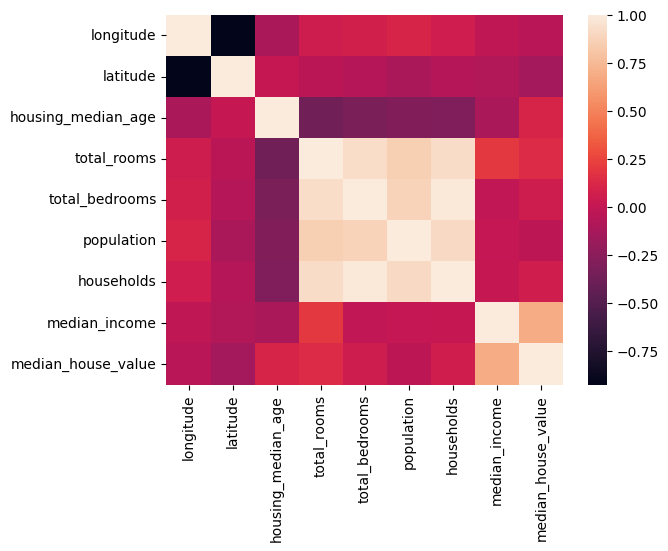

In [10]:
corr = combi.corr(method='pearson')
print(type(corr))
sns.heatmap(corr)

In [11]:
#print(combi.median_house_value.values[:10])
y=combi.median_house_value.values
x=combi.drop(['median_house_value'],axis=1)
print(y[:10],x[:10])
#print(y.head)


[66900. 80100. 85700. 73400. 65500. 74000. 82400. 48500. 58400. 48100.]    longitude  latitude  ...  households  median_income
0    -114.31     34.19  ...       472.0         1.4936
1    -114.47     34.40  ...       463.0         1.8200
2    -114.56     33.69  ...       117.0         1.6509
3    -114.57     33.64  ...       226.0         3.1917
4    -114.57     33.57  ...       262.0         1.9250
5    -114.58     33.63  ...       239.0         3.3438
6    -114.58     33.61  ...       633.0         2.6768
7    -114.59     34.83  ...       158.0         1.7083
8    -114.59     33.61  ...      1056.0         2.1782
9    -114.60     34.83  ...       271.0         2.1908

[10 rows x 8 columns]


In [73]:
feature_len=len(x.columns)
print(feature_len)

8


In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1, random_state=1)
print(x_train.shape, x_val.shape,y_train.shape,y_val.shape)
print(x_train[:10],y_train[:10])



(18000, 8) (2000, 8) (18000,) (2000,)
       longitude  latitude  ...  households  median_income
1810     -117.26     32.81  ...       395.0         2.9200
1145     -114.61     33.62  ...       242.0         2.1759
2377     -117.53     34.10  ...       458.0         3.7917
13417    -121.94     37.30  ...       331.0         3.2727
7401     -118.35     34.02  ...      1371.0         1.5143
5696     -118.18     33.77  ...       488.0         1.1295
14602    -122.16     37.42  ...       581.0        11.0492
7182     -118.33     34.15  ...       138.0         2.3667
14991    -122.24     37.77  ...       373.0         3.6417
2744     -118.01     34.14  ...       744.0         2.8352

[10 rows x 8 columns] [326500.  61500. 103000. 262500. 118800. 137500. 500001.  17500. 206300.
 161700.]


In [100]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Concatenate,Normalization
from keras.models import Model 
from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)

2.16.1


In [122]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
normalizer =Normalization(axis=-1) # I do not know how this normalizer works but I will figure out https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())
print(x_train.mean(axis=0)) #compute mean over columns, see also apply and aggregate function
#mean=np.mean(x_train)
#sd=np.std(x_train)
##x_norm=(x_train - mean)/sd
#print(x_norm.shape)
#x_norm.head
#print(len(x_train),x_train.shape)
#x_train.shape
#print(np.mean(x_train[:5]))
#print(x_train[["households","longitude"]],x_train.iloc[1:2,2:3])



[[-119.57212     35.631916    28.63611   2634.4753     537.99036
  1425.9685     499.65634      3.8720226]]
longitude             -119.572119
latitude                35.631917
housing_median_age      28.636111
total_rooms           2634.475222
total_bedrooms         537.990333
population            1425.968500
households             499.656333
median_income            3.872023
dtype: float64


This is what I learn: The elements of the last axis will always be numbers/scalars! 

In [123]:
model = Sequential()
#model.add(normalizer)
print(x_train.shape,feature_len)
model.add(Input(shape=(8,)))
model.add(Dense(30,activation = "relu"))
model.add(Dense(30,activation = "relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(1))
model.summary()

(18000, 8) 8


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,649 (6.44 KB)

 Trainable params: 1,649 (6.44 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model = Sequential()
#model.add(normalizer)
#model.add(keras.Input(shape=x_train.shape))
model.add(Dense(30,input_dim=feature_len,activation = "relu"))
model.add(Dense(30,activation = "relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(1))
model.summary()

/Users/sbrunswi/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,649 (6.44 KB)

 Trainable params: 1,649 (6.44 KB)

 Non-trainable params: 0 (0.00 B)

I still do not understand what is going on here with the sequential layer and input